# 2019 Bay Wheels Ride Data Exploration and Visualization
## by Youssef Farahat

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
bike_df = pd.read_csv("201902-fordgobike-tripdata.csv")
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

## Data Cleaning

In [6]:
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
bike_df.duplicated().sum()

0

In [8]:
bike_df.dropna(inplace=True)
bike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [9]:
bike_df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [10]:
bike_df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [11]:
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

In [12]:
bike_df['user_type'] = bike_df['user_type'].astype('category')
bike_df['member_gender'] = bike_df['member_gender'].astype('category')

In [13]:
##gender = ['Male', 'Female', 'Other']
##gendercat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
##bike_df['member_gender'] = bike_df['member_gender'].astype(gendercat)

bike_df['start_date'] = bike_df.start_time.dt.strftime('%d')

In [14]:
bike_df.rename(columns={'member_birth_year':'member_age', 'duration_sec':'duration_minute'}, inplace=True)
bike_df.member_age = 2021 - bike_df.member_age
bike_df['duration_minute'] = bike_df['duration_minute']/60

In [15]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
bike_df['weekday'] = bike_df.start_time.dt.strftime('%A')
bike_df['weekday'] = bike_df['weekday'].astype(weekdaycat)

In [16]:
def setIsWeekend(x):
    if (x == "Saturday") | (x == "Sunday"):
        return "Weekend"
    else:
        return "Weekday"

In [17]:
bike_df['is_weekend'] = bike_df.weekday.apply(lambda x: setIsWeekend(x))

In [18]:
bike_df.sort_values(by='weekday', inplace=True)

In [19]:
bike_df.tail()

,duration_minute,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip,start_date,weekday,is_weekend
172164,10.283333,2019-02-03 17:00:32.483,2019-02-03 17:10:49.936,168.0,Alcatraz Ave at Shattuck Ave,37.849595,-122.265569,241.0,Ashby BART Station,37.852477,-122.270213,4497,Subscriber,32.0,Male,No,03,Sunday,Weekend
172166,8.800000,2019-02-03 17:01:49.967,2019-02-03 17:10:38.584,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,245.0,Downtown Berkeley BART,37.870139,-122.268422,5365,Subscriber,28.0,Male,No,03,Sunday,Weekend
172167,8.433333,2019-02-03 17:02:11.665,2019-02-03 17:10:38.514,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,245.0,Downtown Berkeley BART,37.870139,-122.268422,2673,Subscriber,28.0,Male,No,03,Sunday,Weekend
172152,17.933333,2019-02-03 16:57:22.222,2019-02-03 17:15:18.634,58.0,Market St at 10th St,37.776619,-122.417385,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,5300,Subscriber,28.0,Female,Yes,03,Sunday,Weekend
173826,7.366667,2019-02-03 09:11:12.771,2019-02-03 09:18:34.913,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,245.0,Downtown Berkeley BART,37.870139,-122.268422,5391,Subscriber,23.0,Male,No,03,Sunday,Weekend


In [20]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 82681 to 173826
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_minute          174952 non-null  float64       
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type   

### What is the structure of your dataset?

> There are 174877 fordgobike trips in the dataset with 16 feautures (duration_minutes, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_age, member_gender, bike_share_for_all_trip).

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figuring out how trip duration is dependent on other features from the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> As I think older members tends to travel less, I could see that the trip duration is dependent on member age. I also think user type, and gender could also have an effect on duration.

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: duration_minute.

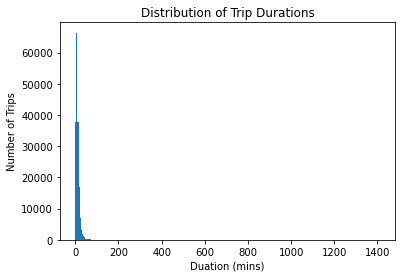

In [21]:
binsize = 5
bins = np.arange(0, bike_df['duration_minute'].max() + binsize, binsize)
plt.hist(data = bike_df, x = 'duration_minute', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duation (mins)')
plt.ylabel('Number of Trips')
plt.show()

#### Looks like the 'trip duration' may have some outliers that affect the plot 

In [22]:
bike_df.duration_minute.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_minute, dtype: float64

In [23]:
bike_df['duration_minute'].quantile(0.99)

52.93333333333333

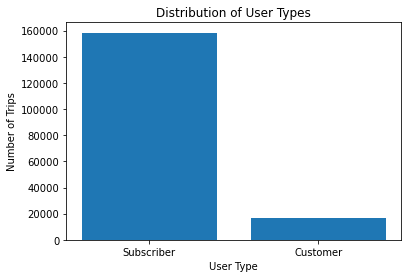

In [24]:
plt.bar(height = bike_df.user_type.value_counts(), x = bike_df.user_type.value_counts().keys())
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.show()

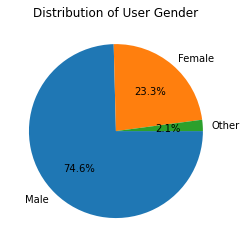

In [25]:
plt.pie(bike_df.member_gender.value_counts(), labels = [str(x) for x in bike_df.member_gender.value_counts().keys()], autopct='%1.1f%%', startangle = 0, counterclock = False);
plt.title('Distribution of User Gender')
plt.show()

## Do weekends have higher trip count?

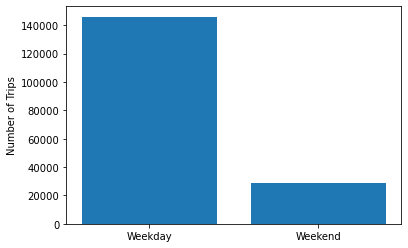

In [26]:
plt.bar(height = bike_df.is_weekend.value_counts(), x = bike_df.is_weekend.value_counts().keys())
plt.ylabel('Number of Trips')
plt.show()

> Looks like user use the system more on normal weekday, maybe they are employees/students and use the system for going to work/school

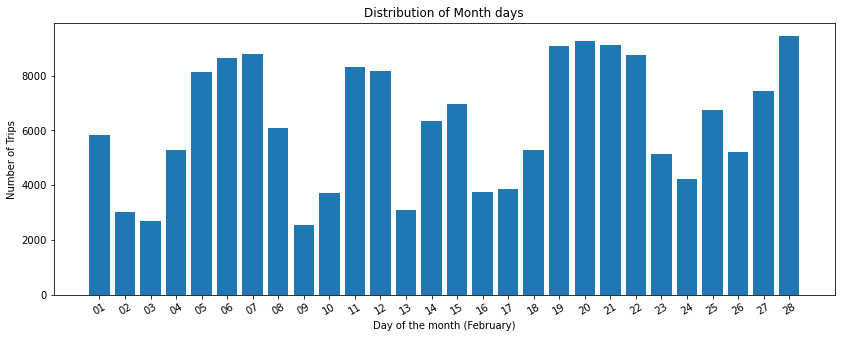

In [27]:
plt.figure(figsize=[14, 5]);
plt.bar(height = bike_df['start_date'].value_counts().sort_index(), x = bike_df['start_date'].value_counts().sort_index().keys())
plt.title('Distribution of Month days')
plt.xlabel('Day of the month (February)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=30)
plt.show()

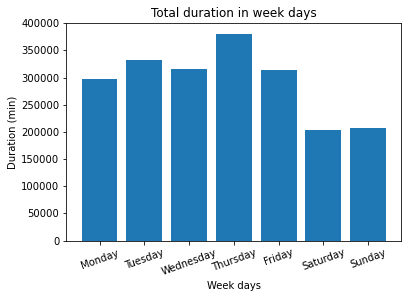

In [28]:
dist = bike_df.groupby('weekday')['duration_minute'].sum()
plt.bar(height = dist, x = dist.index)
plt.title('Total duration in week days')
plt.xlabel('Week days')
plt.ylabel('Duration (min)')
plt.xticks(rotation=20)
plt.show()

## What is the range of ages for the users?

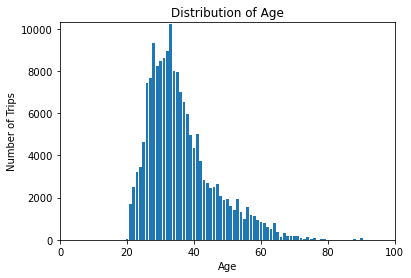

In [29]:
plt.bar(height = bike_df.member_age.value_counts(), x = bike_df.member_age.value_counts().keys())
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.axis([0, 100, 0, bike_df.member_age.value_counts().max() + 100])
plt.show()

#### Looks like the 'member_age' may have some outliers that affect the plot 

In [30]:
bike_df.member_age.describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

In [31]:
bike_df.member_age.quantile(0.99)

66.0

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [32]:
bike_df_filtered = bike_df.query('duration_minute < 53 and member_age < 66')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The average trip duration was around 12 minutes yet there are trips above 100 which led to making the plot unreadable.
Acutally I found out that 99% of the data are below 53 minutes so I filtered those outliers out. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

#### Actually all of the featuers seems to have reasonable distributions
- Subscribed users are far more than regular customers
- Number of trips on weekends are less than normal days, which may indicate that there are a lot of employees/students who are using this service to go to their work/school.
- The mean of users' ages is ~36 and only 1% of them are above the age of 65. so I filtered them out for further investigations.
- Male users repreasents around 75% of the data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

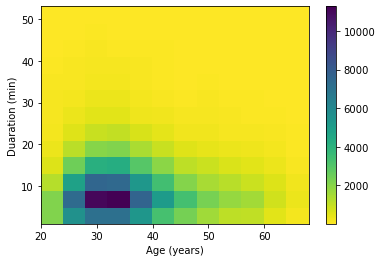

In [33]:
bins_x = np.arange(np.min(bike_df_filtered['member_age']), np.max(bike_df_filtered['member_age']) + 4, 4)
bins_y = np.arange(np.min(bike_df_filtered['duration_minute']), np.max(bike_df_filtered['duration_minute']) + 4, 4)
plt.hist2d(data = bike_df_filtered, x = 'member_age', y = 'duration_minute', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age (years)')
plt.ylabel('Duaration (min)')
plt.show()

## On which day do users spends more time in trips?

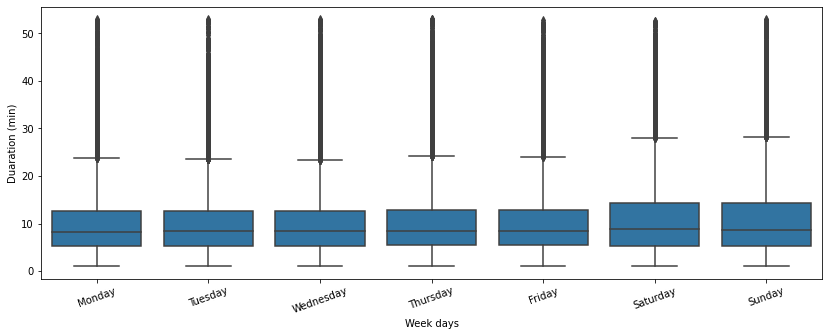

In [36]:
#Trip durations in week days
plt.figure(figsize=[14, 5]);
sb.boxplot(x= bike_df_filtered.weekday, y = bike_df_filtered.duration_minute, color=base_color)
plt.xlabel('Week days')
plt.ylabel('Duaration (min)')
plt.xticks(rotation=20)
plt.show()

> ### Although the number of trips made on weekends was smaller as shown in the univariate section, we see that average duration of the trips is nearly the same in all days, yet the range is bigger on weekends.

## How is the trip duration distributed for each gender?

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

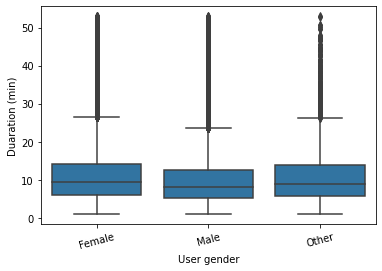

In [35]:
#Relation between the trip duration and gender
base_color = sb.color_palette()[0]
sb.boxplot(data=bike_df_filtered, x='member_gender', y='duration_minute', color=base_color)
plt.xlabel('User gender')
plt.ylabel('Duaration (min)')
plt.xticks(rotation=15)

> ### Female users spends more time on trips

## What is the age range for each user type?

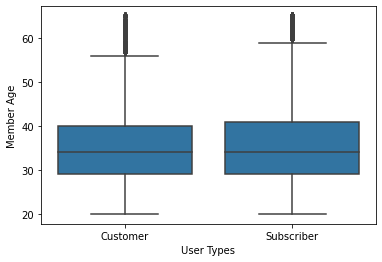

In [37]:
#Relation between the user type and age
sb.boxplot(data=bike_df_filtered, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Types')
plt.ylabel('Member Age')
plt.show()

> ### The age range of subscribers are slightly bigger than customers, old people likes to subscribe more.

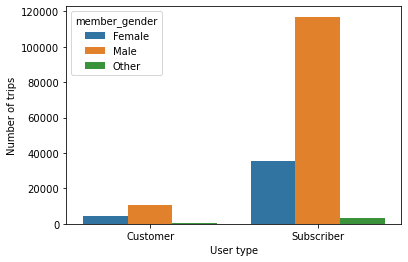

In [38]:
#Relation between the user type and gender
sb.countplot(data = bike_df_filtered, x = 'user_type', hue = 'member_gender')
plt.xlabel('User type')
plt.ylabel('Number of trips')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Although we found out that number of trips made in weekends was less than other week days in the previous section, Looks like the trips duration is nearly the same across all days.
- Although we found out that number of male users are almost 3 times the females in the previous section, male users tends to spend less time on the trips than the other gender(female, other).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- When we look at the percentage of subscribed users to customers taking age in consideration. we can say that while older users tends to subscribe more than regular users.  

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Do customers spends more time on weekends than subscribers?

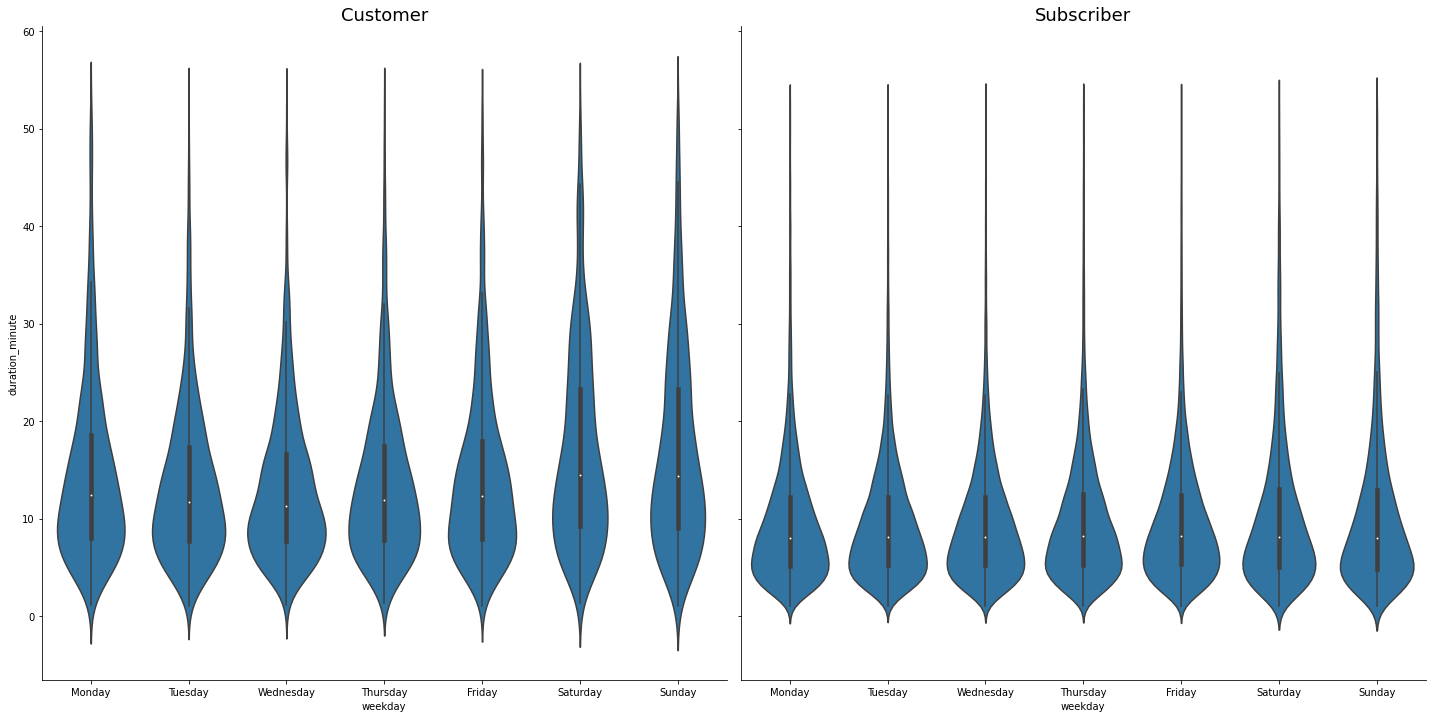

In [42]:
g = sb.FacetGrid(data = bike_df_filtered, col = 'user_type', height=10)
g.map(sb.violinplot, 'weekday', 'duration_minute', order=weekday)
axes = g.axes.flatten()
g.set_titles(col_template="{col_name}", size=18)

> ### Customers spends more time on trips during weekends than regular sucsctibers

## As the age range of the subscribers was bigger than customers. We can assume that older people spend less time in trips

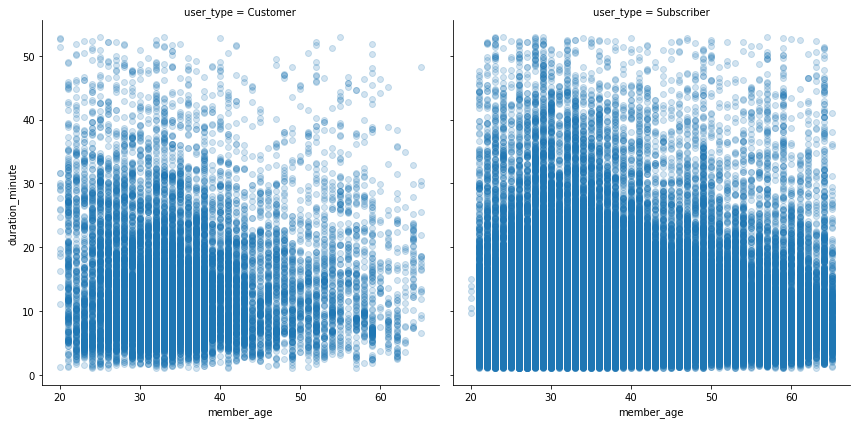

In [40]:
g = sb.FacetGrid(data = bike_df_filtered, 
                     col = 'user_type', height = 6)
g.map(plt.scatter, 'member_age', 'duration_minute', alpha = 0.2);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthened some of the patterns discovered in the previous bivariate and univariate exploration. The short period of trips for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute or students.

### Were there any interesting or surprising interactions between features?

The interactions between features makes actually some sense, as the difference between male and female is not that much, and that of course due to the large number of male riders compared to female ones.
Looking at the 'age' feature we see that a lot of older users are subscribes which is a actually a surprise, and the trip duration is also high for older age. which may indicates that they're taking advantage of the bike sharing system quite differently from younger users, heavily over weekends for city tours or entertainment purpose

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [41]:
bike_df_filtered.to_csv('cleaned_data.csv', index=False)